## Packages

In [1]:
library(readr)
library(ggplot2)
library(dplyr)
library(viridis)
library(gridExtra)
library(rpart)
library(tree)
library(rpart.plot)
library(randomForest)
library(corrplot)
library(ggthemes)
library(stringr)
library(scales)
library(plotly)
library(funModeling)
library(corrplot)
library(fBasics) 
library(kableExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


corrplot 0.84 loaded


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from 

In [2]:
df <- read.csv("../input/xAPI-Edu-Data/xAPI-Edu-Data.csv")
head(df, 10)

gender NationalITy PlaceofBirth StageID      GradeID SectionID Topic
1  M      KW          KuwaIT       lowerlevel   G-04    A         IT   
2  M      KW          KuwaIT       lowerlevel   G-04    A         IT   
3  M      KW          KuwaIT       lowerlevel   G-04    A         IT   
4  M      KW          KuwaIT       lowerlevel   G-04    A         IT   
5  M      KW          KuwaIT       lowerlevel   G-04    A         IT   
6  F      KW          KuwaIT       lowerlevel   G-04    A         IT   
7  M      KW          KuwaIT       MiddleSchool G-07    A         Math 
8  M      KW          KuwaIT       MiddleSchool G-07    A         Math 
9  F      KW          KuwaIT       MiddleSchool G-07    A         Math 
10 F      KW          KuwaIT       MiddleSchool G-07    B         IT   
   Semester Relation raisedhands VisITedResources AnnouncementsView Discussion
1  F        Father   15          16                2                20        
2  F        Father   20          20                3                25        
3  F        Father   10           7                0                30        
4  F        Father   30          25                5                35        
5  F        Father   40          50               12                50        
6  F        Father   42          30               13                70        
7  F        Father   35          12                0                17        
8  F        Father   50          10               15                22        
9  F        Father   12          21               16                50        
10 F        Father   70          80               25                70        
   ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
1  Yes                   Good                     Under-7            M    
2  Yes                   Good                     Under-7            M    
3  No                    Bad                      Above-7            L    
4  No                    Bad                      Above-7            L    
5  No                    Bad                      Above-7            M    
6  Yes                   Bad                      Above-7            M    
7  No                    Bad                      Above-7            L    
8  Yes                   Good                     Under-7            M    
9  Yes                   Good                     Under-7            M    
10 Yes                   Good                     Under-7            M

In [3]:
str(df)

'data.frame':	480 obs. of  17 variables:
 $ gender                  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 1 1 ...
 $ NationalITy             : Factor w/ 14 levels "Egypt","Iran",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ PlaceofBirth            : Factor w/ 14 levels "Egypt","Iran",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ StageID                 : Factor w/ 3 levels "HighSchool","lowerlevel",..: 2 2 2 2 2 2 3 3 3 3 ...
 $ GradeID                 : Factor w/ 10 levels "G-02","G-04",..: 2 2 2 2 2 2 5 5 5 5 ...
 $ SectionID               : Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 2 ...
 $ Topic                   : Factor w/ 12 levels "Arabic","Biology",..: 8 8 8 8 8 8 9 9 9 8 ...
 $ Semester                : Factor w/ 2 levels "F","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ Relation                : Factor w/ 2 levels "Father","Mum": 1 1 1 1 1 1 1 1 1 1 ...
 $ raisedhands             : int  15 20 10 30 40 42 35 50 12 70 ...
 $ VisITedResources        : int  16 20 7 25 50 30 12 10 21 80 ...
 $ Announcements

In [4]:
names(df)<-tolower(names(df))
names(df)

[1] "gender"                   "nationality"             
 [3] "placeofbirth"             "stageid"                 
 [5] "gradeid"                  "sectionid"               
 [7] "topic"                    "semester"                
 [9] "relation"                 "raisedhands"             
[11] "visitedresources"         "announcementsview"       
[13] "discussion"               "parentansweringsurvey"   
[15] "parentschoolsatisfaction" "studentabsencedays"      
[17] "class"

In [5]:
df <- mutate_if(df, is.character, as.factor)

In [6]:
tibble::as_tibble(df)

gender nationality placeofbirth stageid      gradeid sectionid topic    
1   M      KW          KuwaIT       lowerlevel   G-04    A         IT       
2   M      KW          KuwaIT       lowerlevel   G-04    A         IT       
3   M      KW          KuwaIT       lowerlevel   G-04    A         IT       
4   M      KW          KuwaIT       lowerlevel   G-04    A         IT       
5   M      KW          KuwaIT       lowerlevel   G-04    A         IT       
6   F      KW          KuwaIT       lowerlevel   G-04    A         IT       
7   M      KW          KuwaIT       MiddleSchool G-07    A         Math     
8   M      KW          KuwaIT       MiddleSchool G-07    A         Math     
9   F      KW          KuwaIT       MiddleSchool G-07    A         Math     
10  F      KW          KuwaIT       MiddleSchool G-07    B         IT       
11  M      KW          KuwaIT       MiddleSchool G-07    A         Math     
12  M      KW          KuwaIT       MiddleSchool G-07    B         Math     
13  M      KW          KuwaIT       lowerlevel   G-04    A         IT       
14  M      lebanon     lebanon      MiddleSchool G-08    A         Math     
15  F      KW          KuwaIT       MiddleSchool G-08    A         Math     
16  F      KW          KuwaIT       MiddleSchool G-06    A         IT       
17  M      KW          KuwaIT       MiddleSchool G-07    B         IT       
18  M      KW          KuwaIT       MiddleSchool G-07    A         Math     
19  F      KW          KuwaIT       MiddleSchool G-07    A         IT       
20  M      KW          KuwaIT       MiddleSchool G-07    B         IT       
21  F      KW          KuwaIT       MiddleSchool G-07    A         IT       
22  F      KW          KuwaIT       MiddleSchool G-07    B         IT       
23  M      KW          KuwaIT       MiddleSchool G-07    A         IT       
24  M      KW          KuwaIT       MiddleSchool G-07    A         IT       
25  M      KW          KuwaIT       MiddleSchool G-07    B         IT       
26  M      KW          KuwaIT       MiddleSchool G-07    A         IT       
27  M      KW          KuwaIT       MiddleSchool G-07    B         IT       
28  M      KW          KuwaIT       MiddleSchool G-08    A         Arabic   
29  M      KW          KuwaIT       MiddleSchool G-08    A         Science  
30  F      KW          KuwaIT       MiddleSchool G-08    A         Arabic   
⋮   ⋮      ⋮           ⋮            ⋮            ⋮       ⋮         ⋮        
451 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
452 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
453 F      Jordan      Jordan       MiddleSchool G-08    A         Geology  
454 F      Jordan      Jordan       MiddleSchool G-08    A         Geology  
455 F      Jordan      Jordan       MiddleSchool G-08    A         History  
456 F      Jordan      Jordan       MiddleSchool G-08    A         History  
457 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
458 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
459 M      Iraq        Iraq         MiddleSchool G-08    A         Chemistry
460 M      Iraq        Iraq         MiddleSchool G-08    A         Chemistry
461 M      Iraq        Iraq         MiddleSchool G-08    A         Geology  
462 M      Iraq        Iraq         MiddleSchool G-08    A         Geology  
463 M      Iraq        Iraq         MiddleSchool G-08    A         History  
464 M      Iraq        Iraq         MiddleSchool G-08    A         History  
465 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
466 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
467 F      Jordan      Jordan       MiddleSchool G-08    A         Geology  
468 F      Jordan      Jordan       MiddleSchool G-08    A         Geology  
469 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry
470 F      Jordan      Jordan       MiddleSchool G-08    A         Chemistry


In [7]:
levels(df$class)
df$class<-factor(df$class,levels(df$class)[c(2,3,1)])
levels(df$class)

[1] "H" "L" "M"

[1] "L" "M" "H"

In [8]:
levels(df$stageid)
df$stageid<-factor(df$stageid,levels(df$stageid)[c(2,3,1)])
levels(df$stageid)

[1] "HighSchool"   "lowerlevel"   "MiddleSchool"

[1] "lowerlevel"   "MiddleSchool" "HighSchool"

In [9]:
df_count<-df[,sapply(df,is.integer)]
df_factor<-df[,sapply(df,is.factor)]

In [10]:
tibble::glimpse(df)

Rows: 480
Columns: 17
$ gender                   <fct> M, M, M, M, M, F, M, M, F, F, M, M, M, M, F,…
$ nationality              <fct> KW, KW, KW, KW, KW, KW, KW, KW, KW, KW, KW, …
$ placeofbirth             <fct> KuwaIT, KuwaIT, KuwaIT, KuwaIT, KuwaIT, Kuwa…
$ stageid                  <fct> lowerlevel, lowerlevel, lowerlevel, lowerlev…
$ gradeid                  <fct> G-04, G-04, G-04, G-04, G-04, G-04, G-07, G-…
$ sectionid                <fct> A, A, A, A, A, A, A, A, A, B, A, B, A, A, A,…
$ topic                    <fct> IT, IT, IT, IT, IT, IT, Math, Math, Math, IT…
$ semester                 <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F,…
$ relation                 <fct> Father, Father, Father, Father, Father, Fath…
$ raisedhands              <int> 15, 20, 10, 30, 40, 42, 35, 50, 12, 70, 50, …
$ visitedresources         <int> 16, 20, 7, 25, 50, 30, 12, 10, 21, 80, 88, 6…
$ announcementsview        <int> 2, 3, 0, 5, 12, 13, 0, 15, 16, 25, 30, 19, 0…
$ discussion               <in

In [11]:
anyNA(df)

[1] FALSE

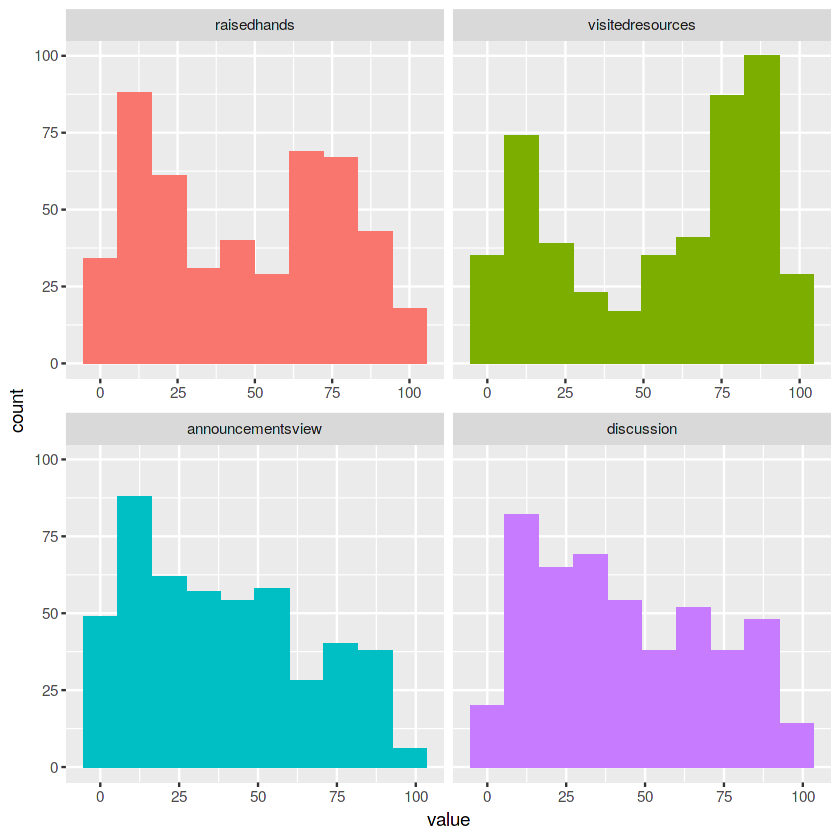

In [12]:
plot_num(df_count)

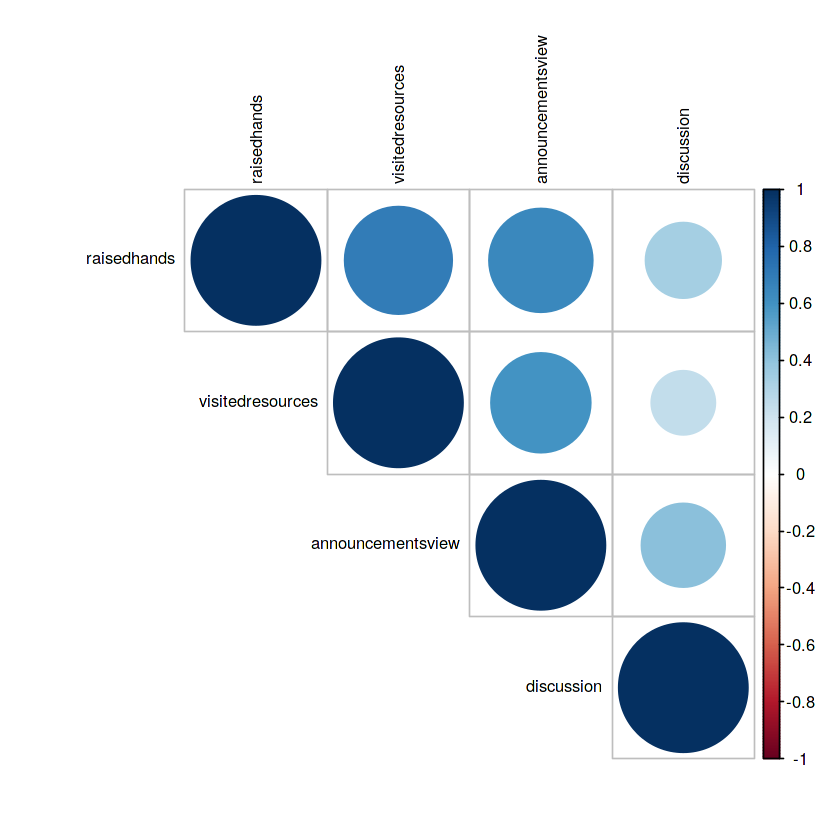

In [13]:
m <- cor(df_count)
corrplot(m, method="circle", type='upper', tl.cex=0.8, tl.col = 'black')

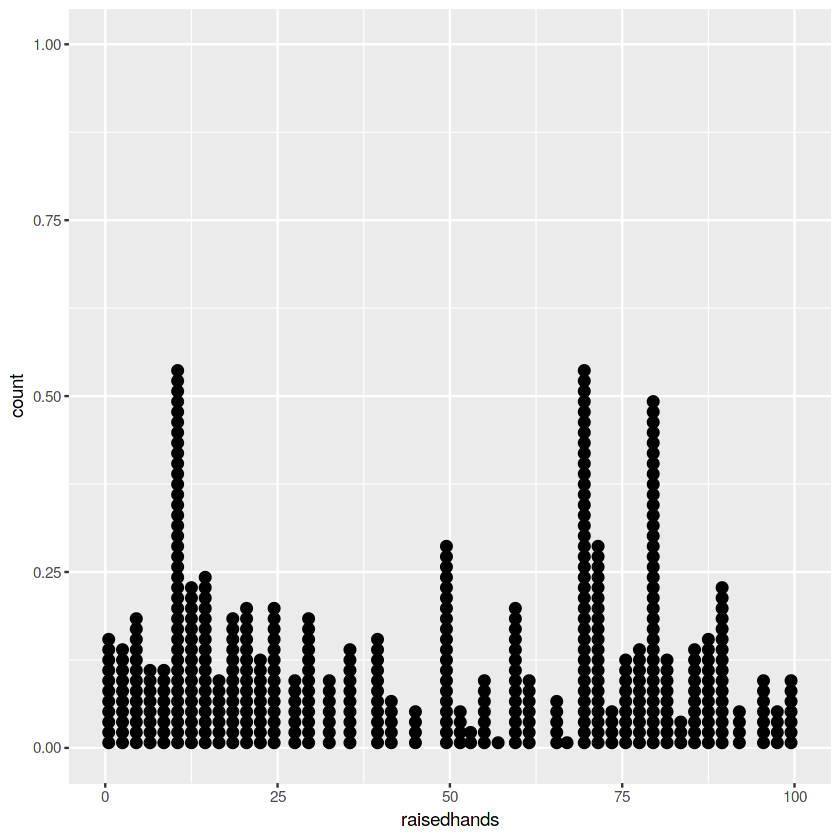

In [14]:
ggplot(df, aes(x = raisedhands)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1.5, binpositions = "all")

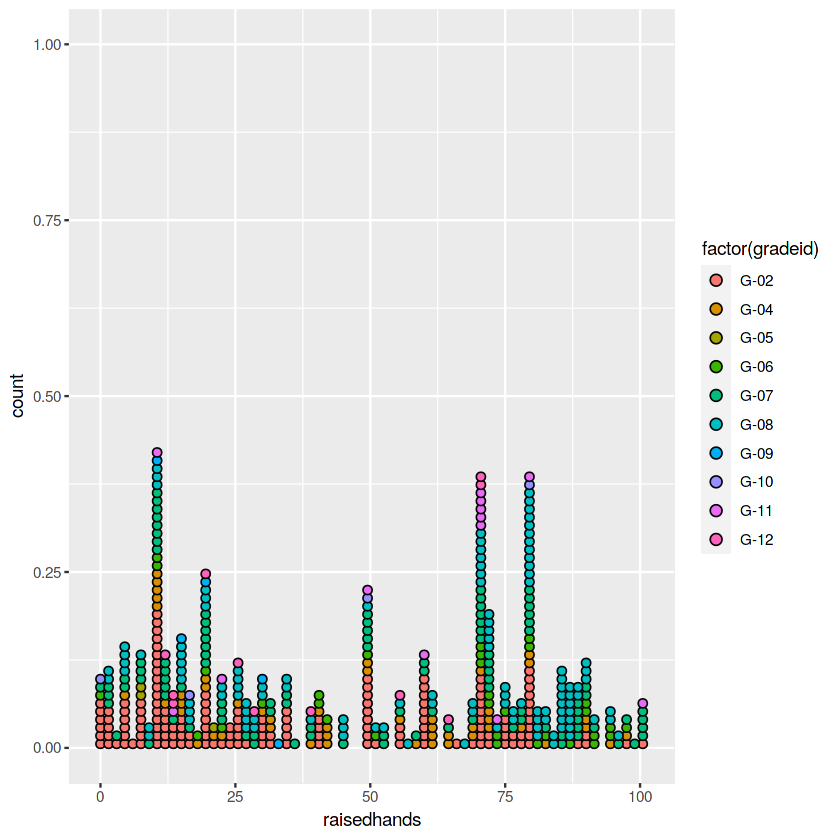

In [15]:
ggplot(df, aes(x = raisedhands, fill = factor(gradeid))) +
    geom_dotplot(stackgroups = TRUE, binwidth = 1.5, method = "histodot")

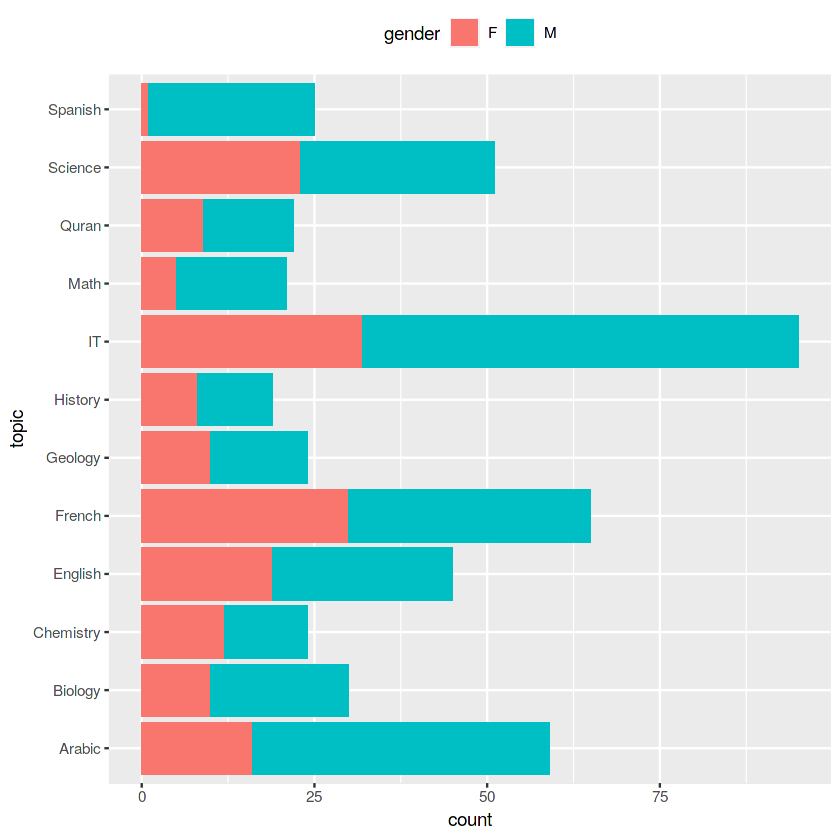

In [16]:
ggplot(df, aes(y = topic)) +
    geom_bar(aes(fill = gender), position = position_stack(reverse = TRUE)) +
    theme(legend.position = "top")

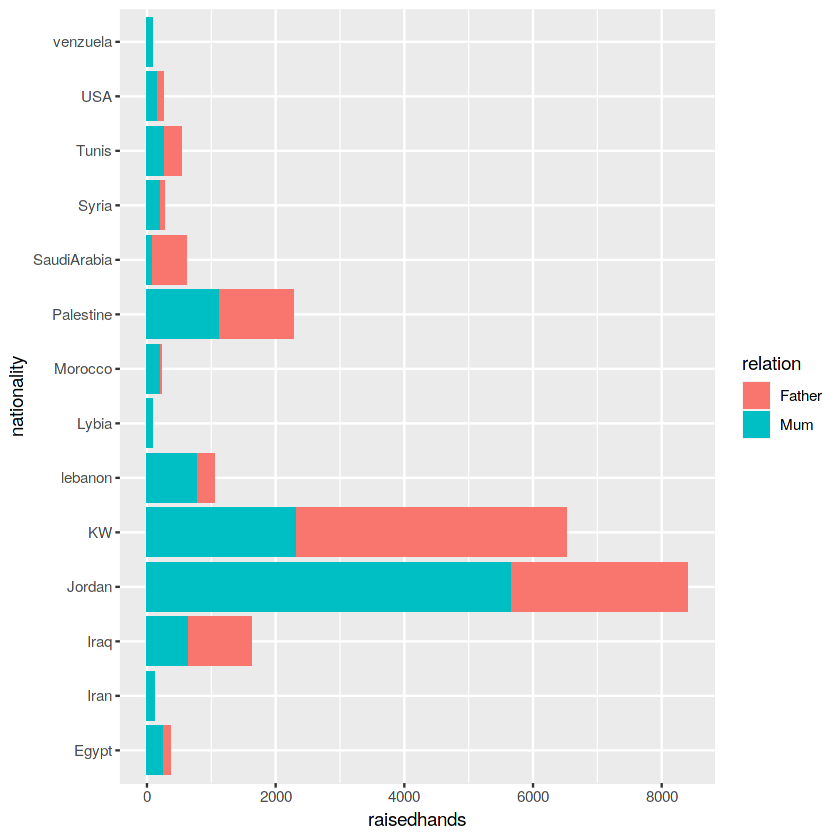

In [17]:
ggplot(df, aes(nationality, raisedhands, fill = relation)) +
    geom_bar(stat = "identity", position = "stack") +
  coord_flip()

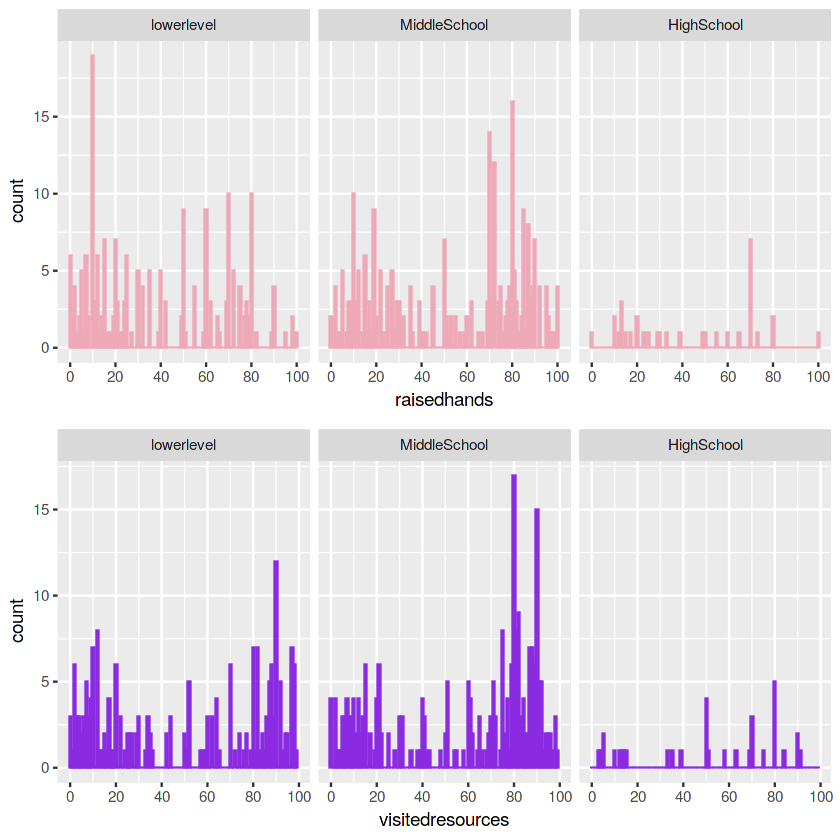

In [18]:
p1 <- ggplot(df,aes(x=raisedhands))+
  geom_histogram(binwidth = 1,color='pink2',fill='pink2')+
  scale_x_continuous(breaks= seq(0,100,20))+
  facet_wrap(~df$stageid)

p2 <- ggplot(df,aes(x=visitedresources))+
  geom_histogram(binwidth = 1,color='blueviolet',fill='blueviolet')+
  scale_x_continuous(breaks= seq(0,100,20))+
  facet_wrap(~df$stageid)

p3 <- ggplot(df,aes(x=discussion))+
  geom_histogram(binwidth = 1,color='coral',fill='coral')+
  scale_x_continuous(breaks= seq(0,100,20))+
  facet_wrap(~df$stageid)

p4 <- ggplot(df,aes(x=announcementsview))+
  geom_histogram(binwidth = 1,color='gold',fill='gold')+
  scale_x_continuous(breaks= seq(0,100,20))+
  facet_wrap(~df$stageid)

grid.arrange(p1,p2)

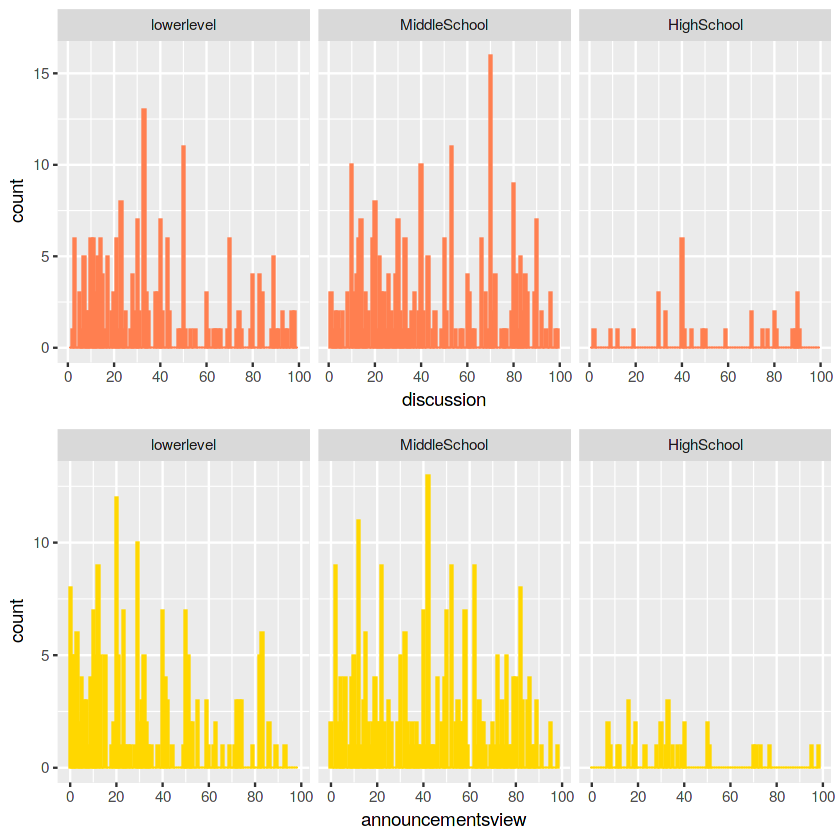

In [19]:
grid.arrange(p3,p4)

In [20]:
plothist<-function(data_a,i){
  data<-data.frame(x=data_a[[i]])
  a<-ggplot(data,aes(x))+
    geom_histogram(col="black",fill="white",binwidth = 5)+
    labs(x=names(data_a)[i])+
    theme(axis.text.x =  element_text(angle = 90,hjust = 1,vjust = .5))
  return(a)
}

plotbar<-function(data_a,i){
  data<-data.frame(x=data_a[[i]])
  a<-ggplot(data,aes(x,fill=x))+
    geom_bar()+
    labs(x=names(data_a)[i])+
    theme(axis.text.x =  element_text(angle = 90,hjust = 1,vjust = .5),
          legend.position = "none")
  return(a)
}

plotbox<-function(data_a,i){
  data<-data.frame(x=data_a[[i]])
  a<-ggplot(data,aes(df$class,x))+
    geom_boxplot(col="black",fill="white",binwidth = 5)+
    labs(x="class",y=names(data_a)[i])+
    coord_flip()
  return(a)
}

plotmosaic<-function(data_a,i){
  data<-df%>%
  group_by(class,x=data_a[[i]])%>%
  summarise(n=n())
a<-ggplot(data,aes(class,x,fill=n))+
  geom_tile(col="white")+
  scale_fill_viridis()+
  geom_text(aes(label=n),col="white")+
  labs(y=names(df_factor)[i])
return(a)
}

doPlots <- function(data_a, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_a=data_a, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

Warning message:
“Ignoring unknown parameters: binwidth”
Warning message:
“Ignoring unknown parameters: binwidth”
Warning message:
“Ignoring unknown parameters: binwidth”
Warning message:
“Ignoring unknown parameters: binwidth”


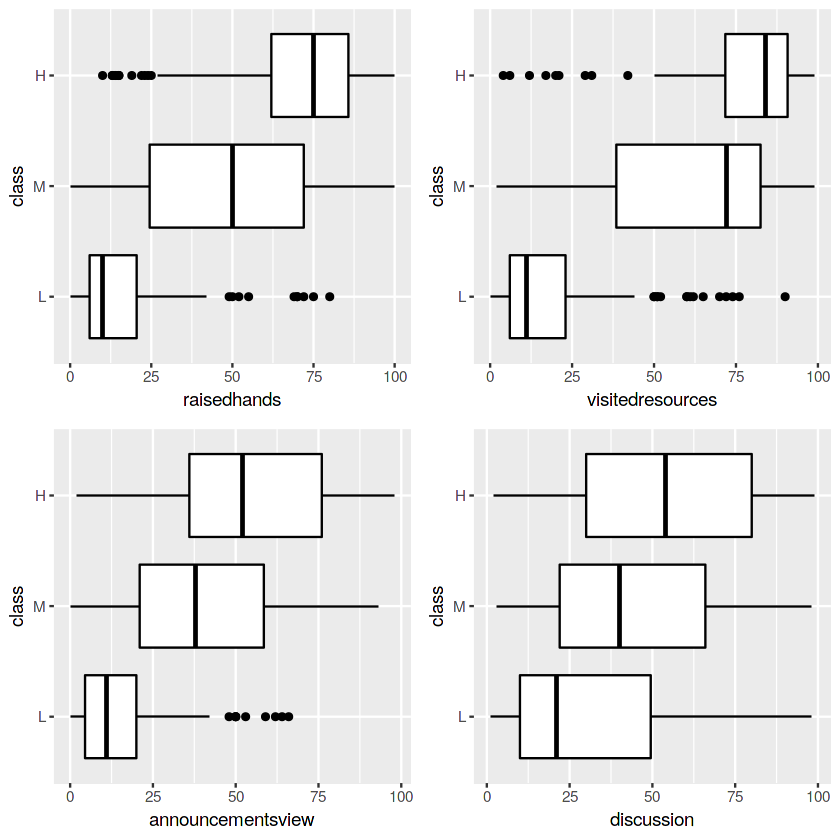

In [21]:
doPlots(df_count,fun=plotbox,ii=1:4,ncol = 2)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)



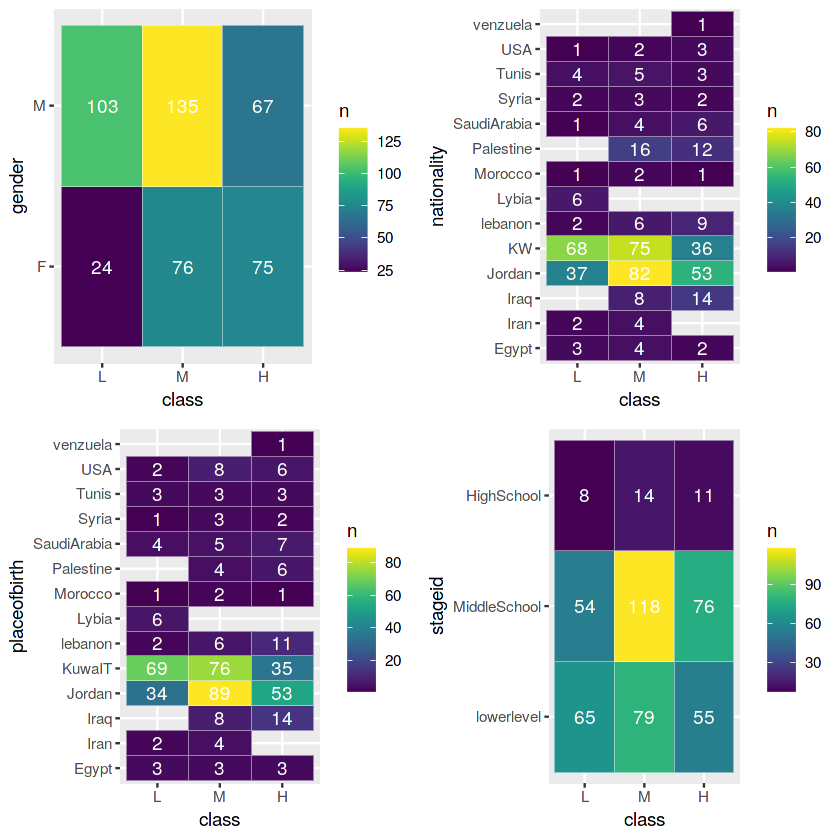

In [22]:
doPlots(df_factor,fun=plotmosaic,ii=1:4,ncol = 2)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)



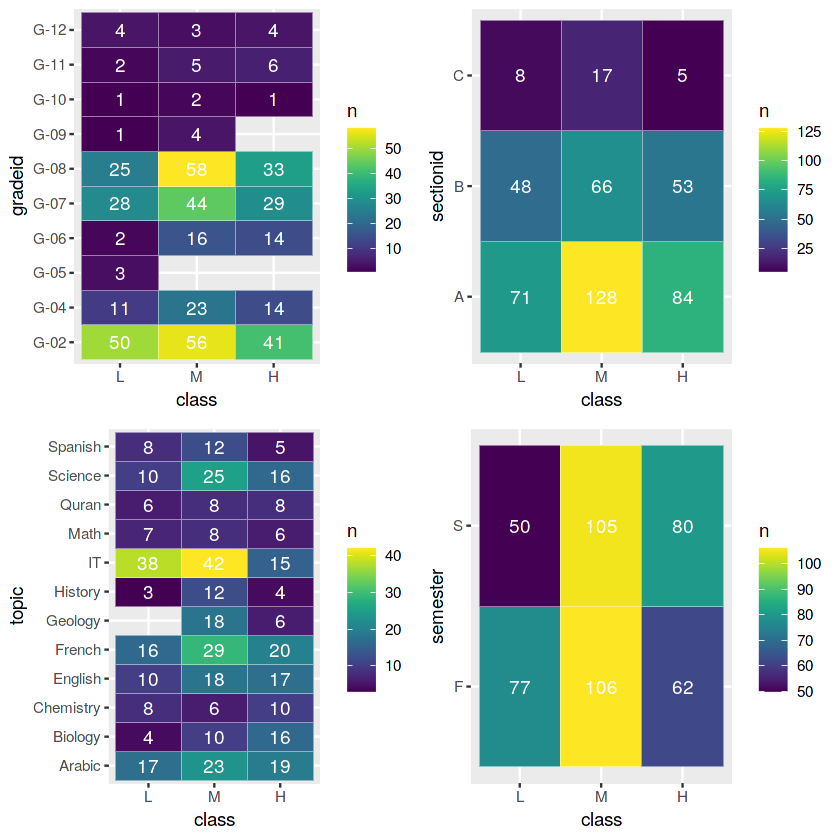

In [23]:
doPlots(df_factor,fun=plotmosaic,ii=5:8,ncol = 2)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)

`summarise()` regrouping output by 'class' (override with `.groups` argument)



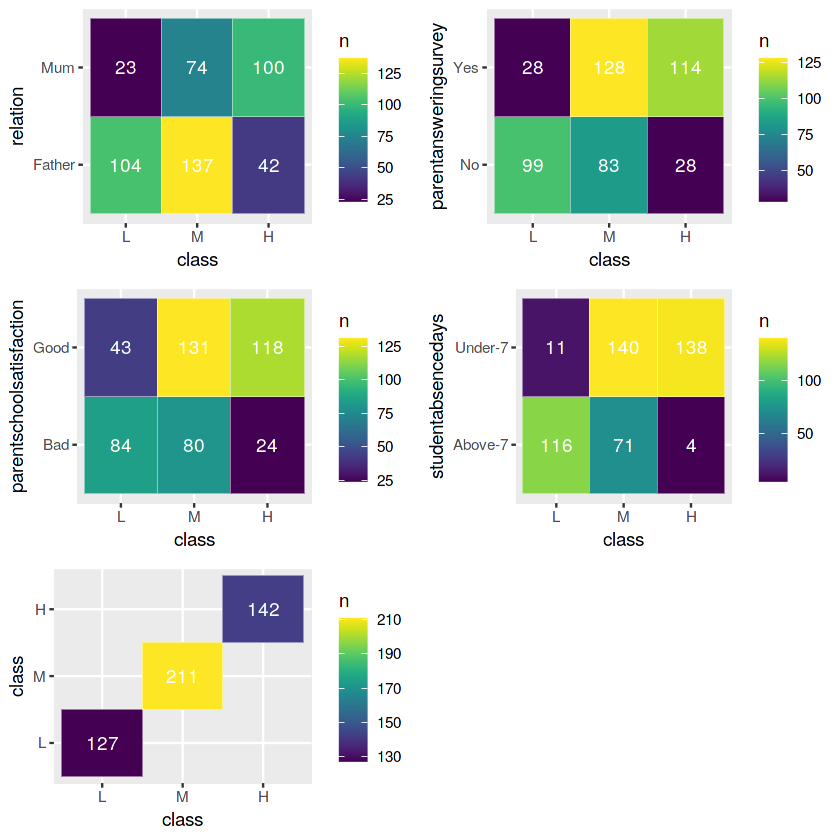

In [24]:
doPlots(df_factor,fun=plotmosaic,ii=9:13,ncol = 2)

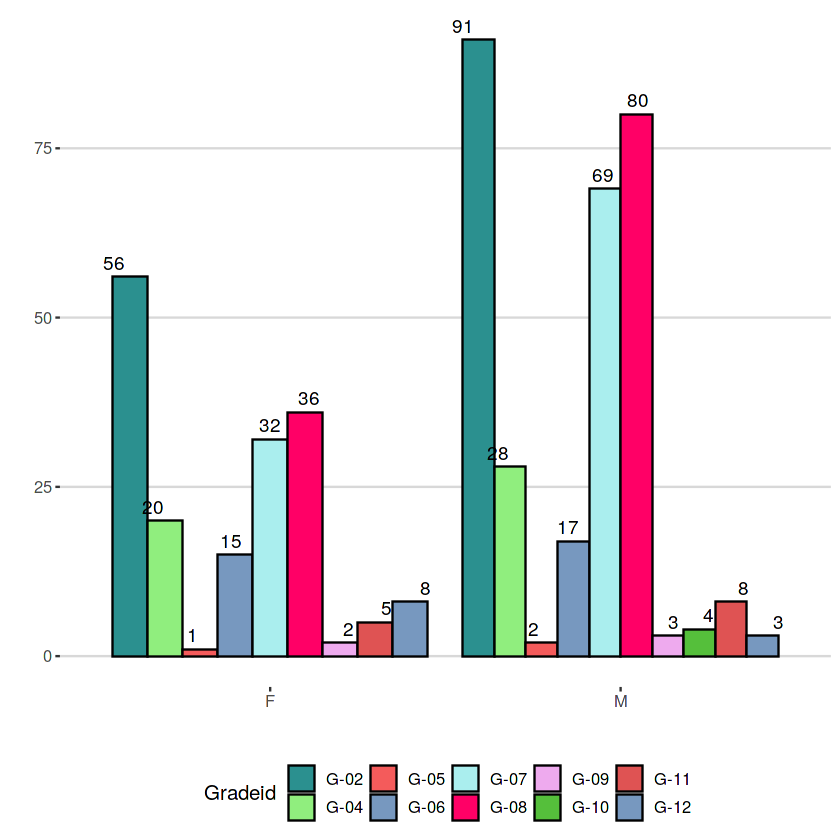

In [25]:
df %>% 
  count(gender,gradeid) %>% 
  ggplot(aes(x=gender,y=n,fill=gradeid))+
  geom_bar(stat='identity',position='dodge', col='black')+
  theme_hc()+
  scale_fill_hc('darkunica')+
  labs(x='',y='', fill='Gradeid')+
  geom_text(aes(label=n),position = position_dodge(width=1), vjust=-.5)

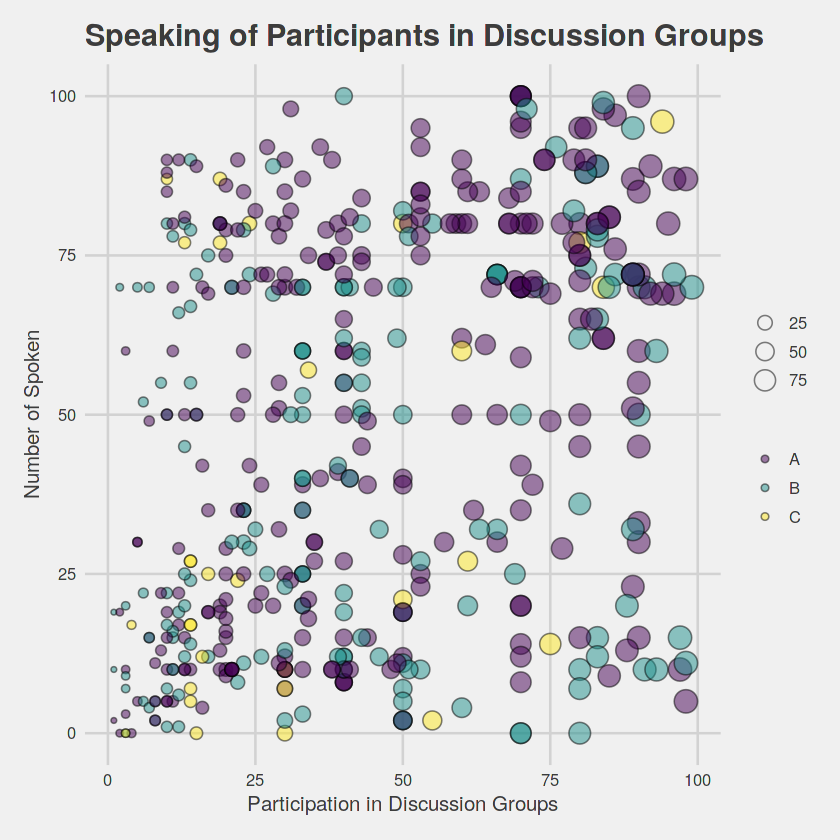

In [26]:
ggplot(data = df) +
  geom_point(mapping = aes(x = `discussion`, y = raisedhands, size = `discussion`, fill = `sectionid`), alpha = 0.5, shape = 21) +
  theme_fivethirtyeight() +
  scale_fill_viridis_d() +
  theme(legend.title = element_blank(),
        legend.position = "right",
        legend.direction = "vertical",
        axis.title = element_text()) +
  labs(x = "Participation in Discussion Groups",
       y = "Number of Spoken",
       title = "Speaking of Participants in Discussion Groups")

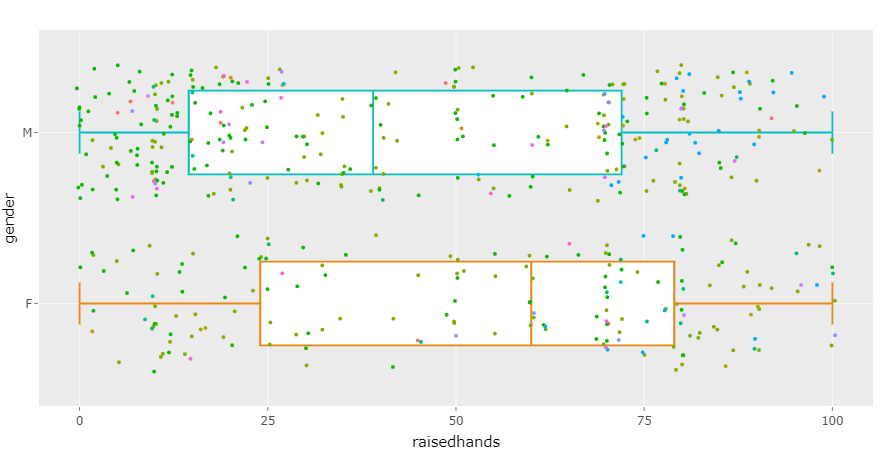

In [27]:
box <- ggplot(df, aes(x = gender, y = raisedhands, color = gender)) +
  geom_boxplot() + 
  geom_jitter(aes(color=nationality), size = 0.5) +
  ggtitle("") + 
  coord_flip() + 
  theme(legend.position="none")
ggplotly(box)

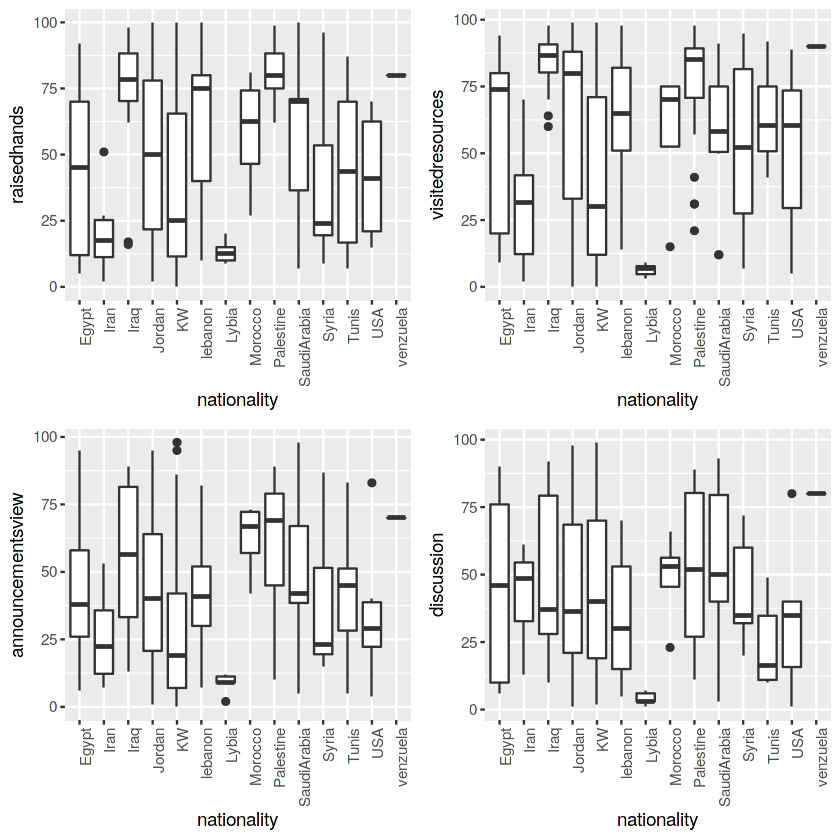

In [28]:
p <- ggplot(data=df)

x1 <- p + geom_boxplot(aes(nationality, raisedhands)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

x2 <- p + geom_boxplot(aes(nationality, visitedresources )) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

x3 <- p + geom_boxplot(aes(nationality, announcementsview )) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

x4 <- p + geom_boxplot(aes(nationality, discussion )) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

pfin1 = grid.arrange(x1,x2,x3,x4, nrow=2)

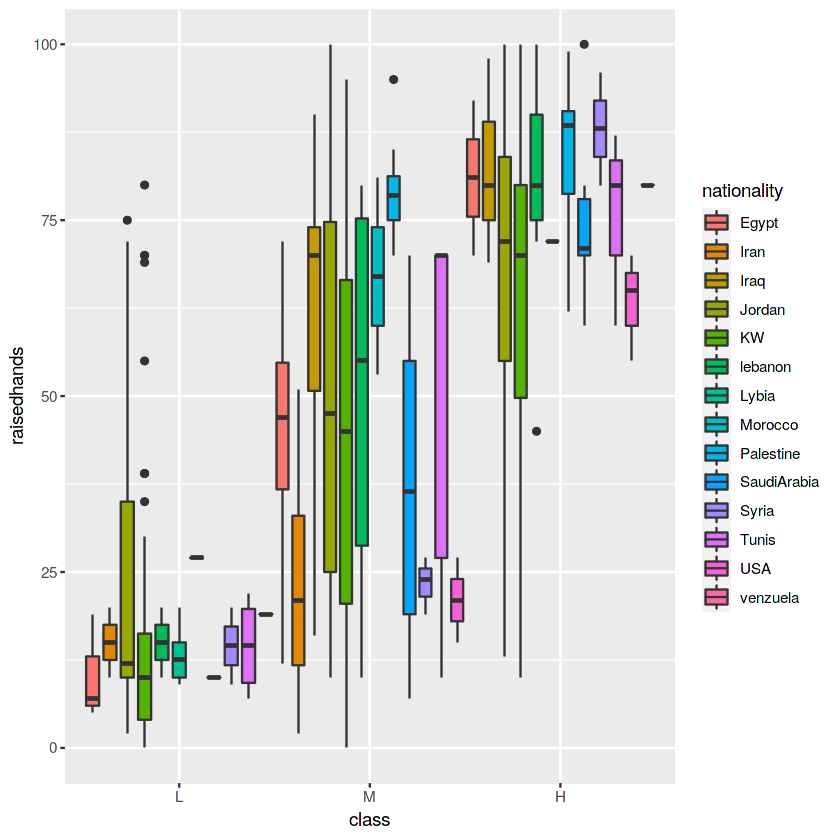

In [29]:
ggplot(df, aes(x=class, y=raisedhands , fill=nationality)) +
  geom_boxplot(position=position_dodge(1))

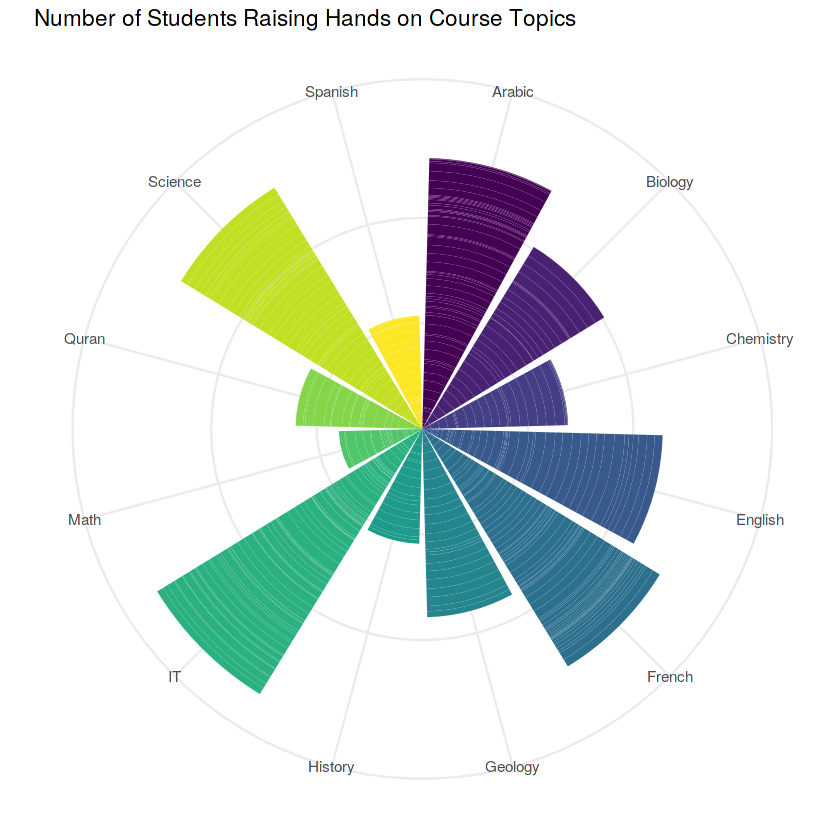

In [30]:
ggplot(data = df)+
  geom_bar(aes(x = topic, y = `raisedhands`, fill = topic), stat = "identity", width = 0.9) +
  theme_minimal() +
  scale_fill_viridis_d() +
  coord_polar() +
  theme(legend.position = "none",
        axis.title = element_blank(),
        axis.text.y = element_blank()) +
  labs(x = NULL,
       y = NULL,
       title = "Number of Students Raising Hands on Course Topics")